# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yahya Abdurrahman
- **Email:** yahyaab444@gmail.com
- **ID Dicoding:** y444hya

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu terhadap jumlah total peminjaman sepeda?
- Apakah terdapat perbedaan dalam jumlah peminjaman sepeda berdasarkan hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df1 = pd.read_csv("day.csv", delimiter=",")
print(df1.head) # membaca file csv "day.csv"

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed 

In [3]:
df2 = pd.read_csv("hour.csv", delimiter=",")
print(df2.head()) # membaca file csv "hour.csv"

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Ketika menggabungkan data dari dua sumber yang berbeda, penting untuk memeriksa apakah ada perbedaan struktur data, karena hal ini bisa mempengaruhi proses analisis lebih lanjut. Kita mungkin perlu menstandarkan struktur sebelum melanjutkan.
- Memahami perubahan ukuran dataset penting untuk mengetahui apakah data yang digunakan cukup representatif dan relevan untuk dianalisis. Jika ukuran dataset sangat kecil setelah penggabungan, mungkin kita perlu mencari sumber data tambahan untuk memastikan hasil analisis yang valid.

### Assessing Data

In [4]:
df1.info() # memberikan gambaran ringkas mengenai DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df1.nunique() # menghitung jumlah nilai unik dalam setiap kolom DataFrame

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [6]:
df1.isna().sum() # menghitung jumlah missing value di setiap kolom DataFrame

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Data yang ada duplikatnya pada file day.csv: ", df1.duplicated().sum())

Data yang ada duplikatnya pada file day.csv:  0


In [8]:
df1.describe() # memberikan statistik deskriptif dari kolom-kolom numerik yang ada pada Dataframe

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df2.info() # memberikan gambaran ringkas mengenai DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
df2.nunique() # menghitung jumlah nilai unik dalam setiap kolom DataFrame

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [11]:
df2.isna().sum() # menghitung jumlah missing value di setiap kolom DataFrame

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Data yang ada duplikatnya pada file hour.csv: ", df2.duplicated().sum())

Data yang ada duplikatnya pada file hour.csv:  0


In [13]:
df2.describe() # memberikan statistik deskriptif dari kolom-kolom numerik yang ada pada Dataframe

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Penting untuk memastikan bahwa tipe data sudah sesuai dengan konteks penggunaannya, karena tipe data yang salah bisa menyebabkan kesalahan saat melakukan analisis, seperti kesalahan dalam pengurutan atau manipulasi tanggal.
- Setelah menganalisis statistik deskriptif dengan df.describe(), kita dapat menemukan bahwa beberapa kolom numerik mungkin memiliki distribusi yang tidak normal atau ada nilai outlier yang ekstrem. Sebagai contoh, kolom cnt (jumlah pengunjung) mungkin menunjukkan rentang yang sangat lebar antara nilai minimum dan maksimum.

### Cleaning Data

In [14]:
df1.dropna(axis=0, inplace=True) # menghapus baris yang mengandung nilai NaN atau missing value

In [15]:
df1.isna().sum() # menghitung kembali missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [16]:
df2.dropna(axis=0, inplace=True) # menghapus baris yang mengandung nilai NaN atau missing value

In [17]:
df2.isna().sum() # menghitung kembali missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [18]:
main_data = pd.concat([df1, df2]) # menggabungkan dua DataFrame
main_data.to_csv("data_final.csv", index=False) # menyimpan hasil gabungan DataFrame
print("Semua data sudah digabungkan")

Semua data sudah digabungkan


**Insight:**
- Kolom dengan banyak nilai yang hilang mungkin tidak memberikan informasi yang signifikan dan bisa dipertimbangkan untuk dihapus, atau nilai yang hilang tersebut perlu diimputasi (diisi dengan nilai tertentu, misalnya rata-rata atau median).
- Baris duplikat bisa mengganggu analisis, karena bisa menyebabkan bias dalam perhitungan, misalnya pada rata-rata atau total pengunjung. Membersihkan duplikat membantu memastikan bahwa hasil analisis lebih akurat dan tidak terdistorsi oleh entri data yang berulang.

## Exploratory Data Analysis (EDA)

### Explore DataFrame yang sudah dibersihkan dan digabungkan

In [19]:
print(main_data) # menampilkan DataFrame yang telah digabungkan

       instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0            1  2011-01-01       1   0     1        0        6           0   
1            2  2011-01-02       1   0     1        0        0           0   
2            3  2011-01-03       1   0     1        0        1           1   
3            4  2011-01-04       1   0     1        0        2           1   
4            5  2011-01-05       1   0     1        0        3           1   
...        ...         ...     ...  ..   ...      ...      ...         ...   
17374    17375  2012-12-31       1   1    12        0        1           1   
17375    17376  2012-12-31       1   1    12        0        1           1   
17376    17377  2012-12-31       1   1    12        0        1           1   
17377    17378  2012-12-31       1   1    12        0        1           1   
17378    17379  2012-12-31       1   1    12        0        1           1   

       weathersit      temp     atemp       hum  windspeed  cas

In [20]:
print(main_data.describe()) # Menampilkan statistik deskriptif dari DataFrame main_data untuk kolom-kolom numerik.
print(main_data.isnull().sum()) # Memastikan tidak ada missing value

            instant        season            yr          mnth       holiday  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean    8354.006405      2.501436      0.502485      6.537051      0.028769   
std     5180.771860      1.107045      0.500008      3.439213      0.167160   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      0.000000   
50%     8324.500000      3.000000      1.000000      7.000000      0.000000   
75%    12851.750000      3.000000      1.000000     10.000000      0.000000   
max    17379.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       3.003424      0.682772      1.424075      0.496922      0.475718   
std        2.005677      0.465410      0.635830    

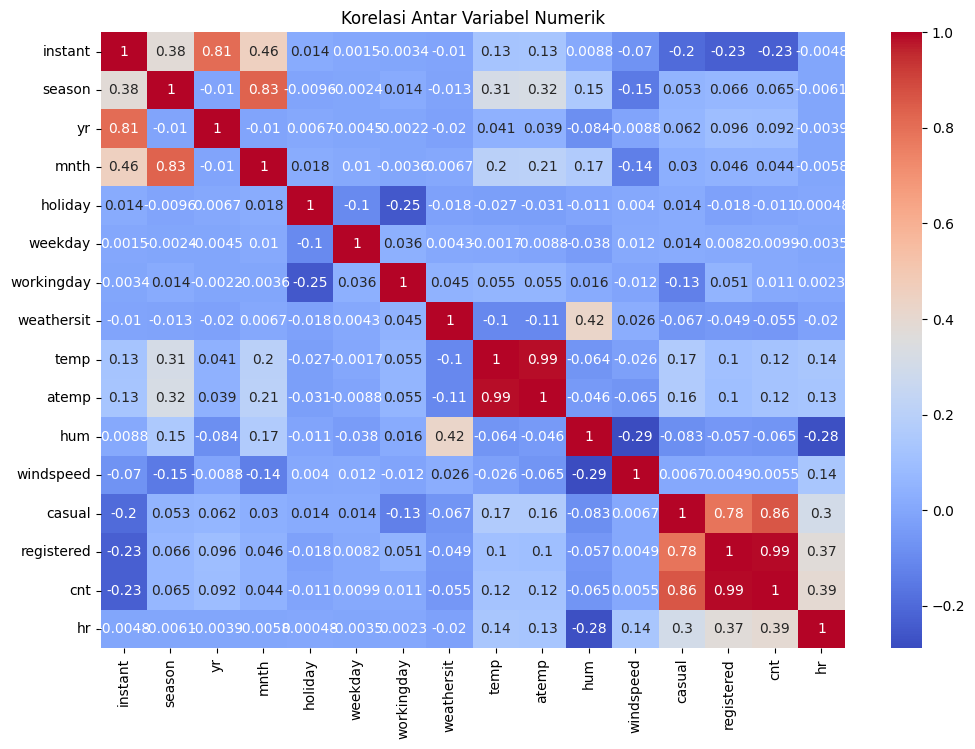

In [21]:
# Memilih hanya kolom-kolom yang memiliki tipe data numerik (float64 dan int64) dari DataFrame main_data.
kolom_numerik = main_data.select_dtypes(include=['float64', 'int64'])

# Menghitung korelasi antar variabel numerik dalam DataFrame kolom_numerik menggunakan metode Pearson (default).
matrix_korelasi = kolom_numerik.corr()

# Visualisasikan korelasi menggunakan heatmap
plt.figure(figsize=(12,8))
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

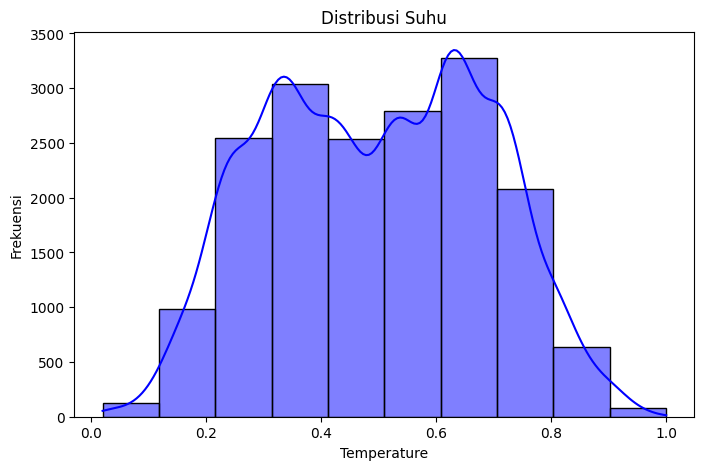

In [22]:
# Univariate EDA: Distribusi Suhu (temp)
plt.figure(figsize=(8, 5))
sns.histplot(main_data['temp'], kde=True, bins=10, color='blue')
plt.title('Distribusi Suhu')
plt.xlabel('Temperature')
plt.ylabel('Frekuensi')
plt.show()

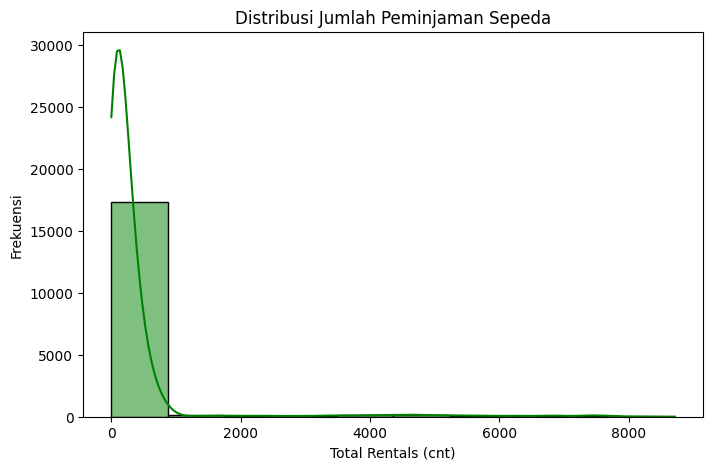

In [23]:
# Univariate EDA: Distribusi Jumlah Peminjaman Sepeda (cnt)
plt.figure(figsize=(8, 5))
sns.histplot(main_data['cnt'], kde=True, bins=10, color='green')
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-24-bf9781454f45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='workingday', data=main_data, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


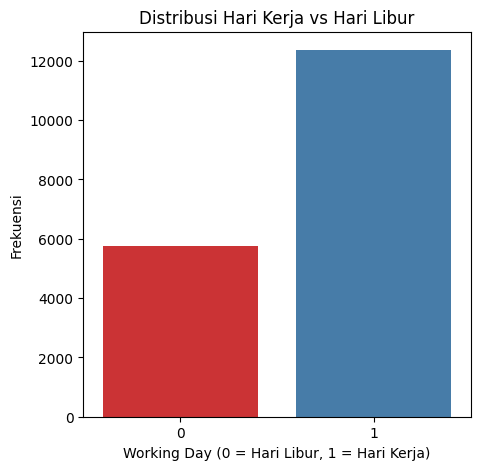

In [24]:
# Univariate EDA: Distribusi Hari Kerja (workingday)
plt.figure(figsize=(5, 5))
sns.countplot(x='workingday', data=main_data, palette='Set1')
plt.title('Distribusi Hari Kerja vs Hari Libur')
plt.xlabel('Working Day (0 = Hari Libur, 1 = Hari Kerja)')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Sebagian besar peminjaman sepeda terjadi dalam kondisi suhu yang nyaman, di rentang suhu sedang, yang mungkin ideal untuk aktivitas bersepeda.
- Menunjukkan sebaran jumlah peminjaman.
- Mayoritas data berasal dari hari kerja, sehingga analisis lebih banyak mencerminkan pola peminjaman selama hari kerja. Ini menunjukkan bahwa orang lebih sering menggunakan layanan sepeda untuk kebutuhan sehari-hari (misalnya, pergi bekerja) daripada untuk rekreasi selama hari libur.
- Suhu memiliki hubungan positif dengan jumlah peminjaman sepeda. Semakin tinggi suhu, semakin banyak orang yang meminjam sepeda. Ini mungkin disebabkan karena cuaca yang lebih hangat lebih nyaman untuk bersepeda.
- Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Ini mungkin menunjukkan bahwa sepeda lebih sering digunakan sebagai sarana transportasi selama hari kerja untuk keperluan seperti bekerja atau bersekolah, sedangkan pada hari libur peminjaman lebih dipengaruhi oleh faktor rekreasi atau kondisi cuaca yang lebih buruk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh suhu terhadap jumlah total peminjaman sepeda?

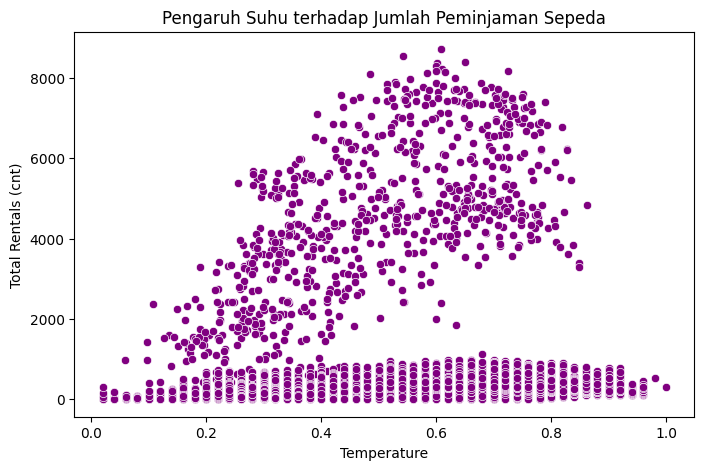

In [25]:
# Membuat figure dan axes secara eksplisit
fig, ax = plt.subplots(figsize=(8, 5))
# Membuat line plot untuk menggambarkan hubungan antara suhu dan peminjaman sepeda
sns.lineplot(x='temp', y='cnt', data=df, color='purple', ax=ax)
# Menambahkan judul dan label sumbu
ax.set_title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
ax.set_xlabel('Temperature')
ax.set_ylabel('Total Rentals (cnt)')
# Menampilkan plot di Streamlit
st.pyplot(fig)

# Membuat figure dan axes secara eksplisit
fig, ax = plt.subplots(figsize=(8, 5))
# Membuat countplot dengan 'ax' sebagai objek plotting
sns.countplot(x='workingday', data=df, palette='Set1', hue='workingday', ax=ax, legend=False)
# Menambahkan judul dan label sumbu
ax.set_title('Perbandingan Jumlah Peminjaman Berdasarkan Hari Kerja dan Hari Libur')
ax.set_xlabel('Working Day (0 = Hari Libur, 1 = Hari Kerja)')
ax.set_ylabel('Total Rentals (cnt)')
# Menampilkan plot
st.pyplot(fig)

### Pertanyaan 2: Apakah terdapat perbedaan dalam jumlah peminjaman sepeda berdasarkan hari kerja dan hari libur?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


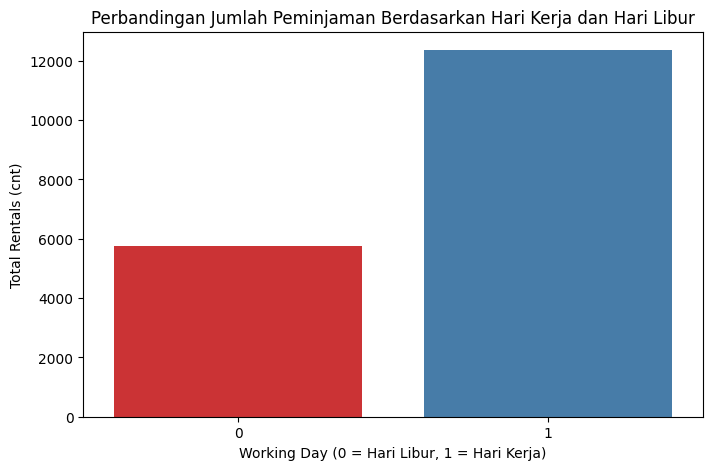

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='workingday', data=main_data, palette='Set1', hue='workingday', legend=False)
plt.title('Perbandingan Jumlah Peminjaman Berdasarkan Hari Kerja dan Hari Libur')
plt.xlabel('Working Day (0 = Hari Libur, 1 = Hari Kerja)')
plt.ylabel('Total Rentals (cnt)')
plt.show()

**Insight:**
- Scatter plot menunjukkan tren bahwa saat suhu meningkat, jumlah peminjaman sepeda juga cenderung meningkat. Ini menunjukkan hubungan positif antara suhu yang lebih hangat dengan peningkatan penggunaan sepeda.
- Boxplot ini menunjukkan bahwa jumlah peminjaman sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur. Median jumlah peminjaman pada hari kerja lebih tinggi, menunjukkan bahwa sepeda lebih sering digunakan

## Analisis Lanjutan (Opsional)

## Conclusion

# Kesimpulan Berdasarkan Hasil Analisis


1.   Pengaruh Suhu terhadap Jumlah Total Peminjaman Sepeda:
    - Dari hasil visualisasi scatter plot, terlihat bahwa suhu memiliki hubungan positif dengan jumlah total peminjaman sepeda. Semakin tinggi suhu (temp), semakin banyak sepeda yang dipinjam (cnt).
    - Hal ini dapat diinterpretasikan bahwa kenyamanan fisik yang dipengaruhi oleh suhu menjadi faktor penting dalam keputusan meminjam sepeda.
2.   Perbedaan Jumlah Peminjaman Sepeda Berdasarkan Hari Kerja dan Hari Libur:
    - Dari visualisasi boxplot, kita melihat bahwa jumlah peminjaman sepeda pada hari kerja (workingday = 1) cenderung lebih tinggi dibandingkan dengan hari libur (workingday = 0). Median peminjaman pada hari kerja lebih tinggi, dengan variasi yang lebih rendah dibandingkan dengan hari libur.
    - Kesimpulan: Peminjaman sepeda lebih banyak terjadi pada hari kerja, mencerminkan fungsi sepeda sebagai sarana transportasi utama pada hari-hari tersebut.
